### Plagiarism Checker

This Python code is written to implement a plagiarism checker tool for PDF files. For this TF-IDF vectorization and cosine similarity are used.
The code is written such that it collects .PDF files from a specified directory, extracts its text content, and converts the text content into .txt files for analysis. The text data is then transformed into numerical vectors using TF-IDF, which captures word importance in documents.

Cosine similarity is calculated between each pair of vectorized text documents to measure their similarity. Here the documents are compared amoung themselves for Plagiarism. The code can be alterd to take user input and check plagiarism on it.

The results of the comaprison (plagiarism) are visualized in a bar chart, with higher bars representing higher similarity scores, potentially indicating plagiarism.

The accuracy of the plagiarism checker depends on various aspects. The documents should be transformed in the appropriate format by checking and removing unwanted text (which can be done using NLP concepts).

In [1]:
#!pip install PyPDF2

In [2]:
import os
import PyPDF2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [3]:
dir = (r'D:\Arya\TE\sem 6\CSS\PRAC')
files = [doc for doc in os.listdir(dir) if doc.endswith('.pdf')]
files

['CSS_EXPERIMENT 1 .pdf',
 'CSS_EXPERIMENT 10.pdf',
 'CSS_EXPERIMENT 11.pdf',
 'CSS_EXPERIMENT 2.pdf',
 'CSS_EXPERIMENT 3.pdf',
 'CSS_EXPERIMENT 4.pdf',
 'CSS_EXPERIMENT 5.pdf',
 'CSS_EXPERIMENT 6.pdf',
 'CSS_EXPERIMENT 7.pdf',
 'CSS_EXPERIMENT 8.pdf',
 'CSS_EXPERIMENT 9.pdf',
 'EXP 1.pdf',
 'Experiment_5_CSS.pdf']

In [4]:
references = [open(os.path.join(dir, file), 'rb') for file in files]

In [5]:
text_file = ['file1.txt','file2.txt','file3.txt','file4.txt','file5.txt','file6.txt','file7.txt','file8.txt','file9.txt','file10.txt','file11.txt','file12.txt','file13.txt']
j = 0
for file in text_file:
    text = ""
    reader = PyPDF2.PdfReader(references[j])
    with open(os.path.join(dir,file), 'w', encoding='utf-8') as text_file:
            for page_num in range(len(reader.pages)):
                page = reader.pages[page_num]
                text_file.write(page.extract_text())
    j += 1


In [6]:
txt_files = [doc for doc in os.listdir(dir) if doc.endswith('.txt')]
txt_files

['file1.txt',
 'file10.txt',
 'file11.txt',
 'file12.txt',
 'file13.txt',
 'file2.txt',
 'file3.txt',
 'file4.txt',
 'file5.txt',
 'file6.txt',
 'file7.txt',
 'file8.txt',
 'file9.txt']

In [7]:
content = [open(os.path.join(dir, file), encoding = 'utf-8').read() for file in txt_files]

In [8]:
def vectorize(text):
    return TfidfVectorizer().fit_transform(text).toarray()

In [9]:
def Similarity(doc1,doc2):
    return cosine_similarity([doc1,doc2])

In [10]:
vectors = vectorize(content)
vectors

array([[0.        , 0.06914198, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02307959, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.023464  , 0.02720895,
        0.        ],
       ...,
       [0.        , 0.0482615 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.09185931, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06414084, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [11]:
s_vectors = list(zip(txt_files, vectors))

In [12]:
results = set()
x = []
var = []

In [13]:
def plagiarism_check():
        global s_vectors
        new_vectors = s_vectors.copy()
        for file, txt_vector1 in s_vectors:
            cur_indx = new_vectors.index((file, txt_vector1))
            print(cur_indx)
            del new_vectors[cur_indx]
            for doc, txt_vector2 in new_vectors:
                similarity_score = Similarity(txt_vector1, txt_vector2)[0][1]
                final_files = sorted((file,doc))
                var.append(file+" vs "+doc)
                print(Similarity(txt_vector1, txt_vector2))
                print(final_files)
                score = (final_files[0], final_files[1], similarity_score)
                x.append(similarity_score)
                results.add(score)

        return results;

In [14]:
for data in plagiarism_check():
    print(data)
 

0
[[1.         0.33971295]
 [0.33971295 1.        ]]
['file1.txt', 'file10.txt']
[[1.         0.25863587]
 [0.25863587 1.        ]]
['file1.txt', 'file11.txt']
[[1.         0.24717807]
 [0.24717807 1.        ]]
['file1.txt', 'file12.txt']
[[1. 0.]
 [0. 0.]]
['file1.txt', 'file13.txt']
[[1.         0.41378093]
 [0.41378093 1.        ]]
['file1.txt', 'file2.txt']
[[1.         0.32035261]
 [0.32035261 1.        ]]
['file1.txt', 'file3.txt']
[[1.         0.65595157]
 [0.65595157 1.        ]]
['file1.txt', 'file4.txt']
[[1.        0.4705309]
 [0.4705309 1.       ]]
['file1.txt', 'file5.txt']
[[1.         0.51237364]
 [0.51237364 1.        ]]
['file1.txt', 'file6.txt']
[[1.         0.33036631]
 [0.33036631 1.        ]]
['file1.txt', 'file7.txt']
[[1.         0.43066789]
 [0.43066789 1.        ]]
['file1.txt', 'file8.txt']
[[1.         0.45266767]
 [0.45266767 1.        ]]
['file1.txt', 'file9.txt']
0
[[1.         0.28852904]
 [0.28852904 1.        ]]
['file10.txt', 'file11.txt']
[[1.        

In [15]:
import matplotlib.pyplot as plt
print(var[0:5])
print(x[0:5])
print(len(var))
print(len(x))
var = np.array(var)
x = np.array(x)
print(var.ndim, x.ndim)

['file1.txt vs file10.txt', 'file1.txt vs file11.txt', 'file1.txt vs file12.txt', 'file1.txt vs file13.txt', 'file1.txt vs file2.txt']
[0.33971294777667266, 0.2586358727671419, 0.24717807038105552, 0.0, 0.4137809320662301]
78
78
1 1


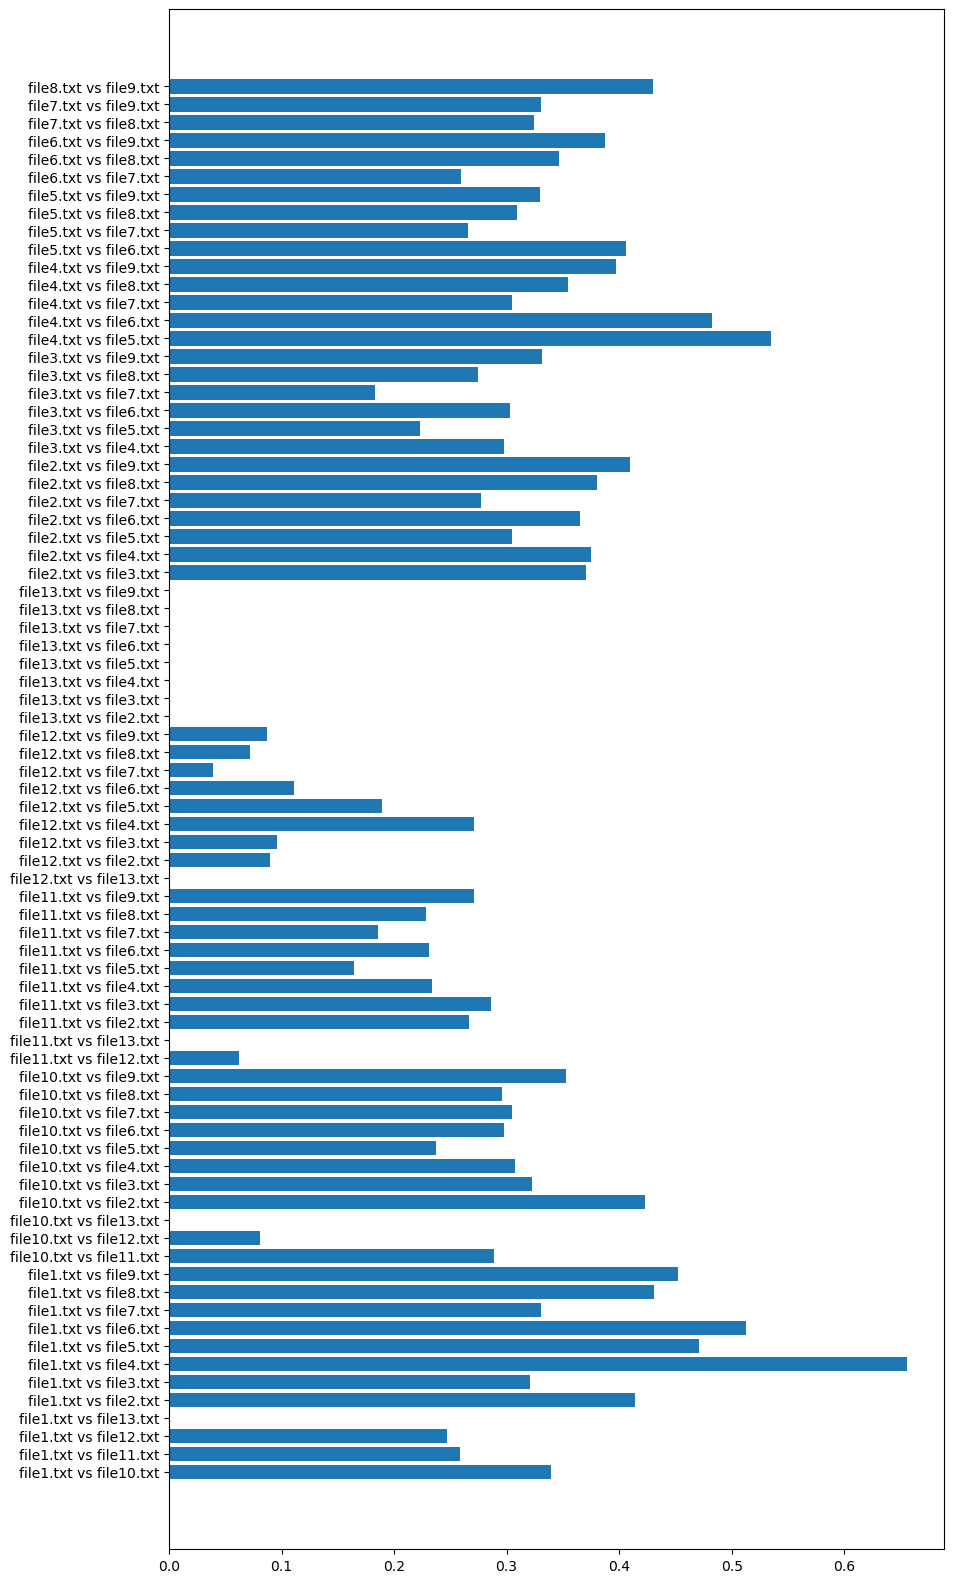

In [16]:
plt.figure(figsize=(10,20))
plt.barh(var, x)
plt.show()